# Hola ! <a class="tocSkip"></a>

Mi nombre es Oscar Flores y me toca revisar tu proyecto de hoy. Si tienes algún comentario que quieras agregar en tus respuestas te puedes referir a mi como Oscar, no hay problema que me trates de tú.

Si veo un error en la primera revisión solamente lo señalaré y dejaré que tú encuentres de qué se trata y cómo arreglarlo. Debo prepararte para que te desempeñes como especialista en Data, en un trabajo real, el responsable a cargo tuyo hará lo mismo. Si aún tienes dificultades para resolver esta tarea, te daré indicaciones más precisas en una siguiente iteración.

Te dejaré mis comentarios más abajo - **por favor, no los muevas, modifiques o borres**

Comenzaré mis comentarios con un resumen de los puntos que están bien, aquellos que debes corregir y aquellos que puedes mejorar. Luego deberás revisar todo el notebook para leer mis comentarios, los cuales estarán en rectángulos de color verde, amarillo o rojo como siguen:

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>
    
Muy bien! Toda la respuesta fue lograda satisfactoriamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Existen detalles a mejorar. Existen recomendaciones.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Se necesitan correcciones en el bloque. El trabajo no puede ser aceptado con comentarios en rojo sin solucionar.
</div>

Cualquier comentario que quieras agregar entre iteraciones de revisión lo puedes hacer de la siguiente manera:

<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> <a class="tocSkip"></a>
</div>


## Resumen de la revisión 1 <a class="tocSkip"></a>

<div class="alert alert-block alert-warning">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Buen trabajo! Tu notebook está casi listo. Debes corregir algunos errores en la parte inicial de transformación de datos y luego en la parte de restaurar los nulos, no debe ser tan simple la imputación. Dejé más detalles en cada una de estas partes. 
    
Saludos!    
</div>

## Resumen de la revisión 2 <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer v2</b> <a class="tocSkip"></a>

Bien hecho! Se corrigieron los puntos necesarios para aprobar tu notebook. Te recomiendo eso si que los comentarios y conclusiones que hagas en tu trabajo los realices en markdown, no en una celda de código, así queda más claro que son comentarios del desarrollo y no comentarios de código.
    
Saludos!    
</div>

----

# Análisis del riesgo de incumplimiento de los prestatarios

Tu proyecto consiste en preparar un informe para la división de préstamos de un banco. Deberás averiguar si el estado civil y el número de hijos de un cliente tienen un impacto en el incumplimiento de pago de un préstamo. El banco ya tiene algunos datos sobre la solvencia crediticia de los clientes.

Tu informe se tendrá en cuenta al crear una **puntuación de crédito** para un cliente potencial. La **puntuación de crédito** se utiliza para evaluar la capacidad de un prestatario potencial para pagar su préstamo.

[En este cuaderno se te brindan pistas, breves instrucciones y sugerencias para pensar. No los ignores, ya que están diseñados para equiparte con la estructura del proyecto y te ayudarán a analizar lo que estás haciendo en un nivel más profundo. Antes de enviar tu proyecto, asegúrate de eliminar todas las sugerencias y descripciones que se te hayan proporcionado. Más bien, haz que este informe parezca como si se lo estuvieras enviando a tus compañeros de equipo para demostrar tus hallazgos: ¡no deben saber que recibiste ayuda externa de nuestra parte! Para ayudarte, hemos colocado las pistas que debes eliminar entre corchetes.]

[Antes de sumergirte en el análisis de tus datos, explica los propósitos del proyecto y las hipótesis que vas a evaluar.]

## Abre el archivo de datos y mira la información general. 

[Empieza con la importación de las librerías y la carga de los datos. Es posible que te des cuenta de que necesitas librerías adicionales a medida que avanzas, lo cual es totalmente normal, solo asegúrate de actualizar esta sección cuando lo hagas.]

In [1]:
import pandas as pd

df = pd.read_csv('/datasets/credit_scoring_eng.csv')
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB
None


## Ejercicio 1. Exploración de datos

**Descripción de los datos**
- `children` - el número de hijos en la familia
- `days_employed` - experiencia laboral en días
- `dob_years` - la edad del cliente en años
- `education` - la educación del cliente
- `education_id` - identificador de educación
- `family_status` - estado civil
- `family_status_id` - identificador de estado civil
- `gender` - género del cliente
- `income_type` - tipo de empleo
- `debt` - ¿había alguna deuda en el pago de un préstamo?
- `total_income` - ingreso mensual
- `purpose` - el propósito de obtener un préstamo

[Ahora vamos a explorar nuestros datos. Querrás ver cuántas columnas y filas hay, observa algunas filas para identificar posibles problemas con los datos.]

In [2]:
num_rows, num_cols = df.shape
print(f'Número de filas: {num_rows}')
print(f'Número de columnas: {num_cols}')



Número de filas: 21525
Número de columnas: 12


In [3]:
df.head()



,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding


[Describe lo que ves y notas en tu muestra de datos mostrada en la pantalla. ¿Existe algún problema que pueda necesitar investigación y cambios adicionales?]

In [4]:
df.describe()
# Sí, a mi punto de vista existen 2 problemas que pueden necesitar investigación/correción. 
#1. La columna days_employed tiene un valor negativo, lo que no tiene sentido porque la experiencia laboral no puede ser negativa.
#2. La columna education tiene valores inconsistentes en cuanto a la capitalización. Por ejemplo, hay valores como “bachelor’s degree” y “secondary education” que están en letras Minúsculas, mientras que hay otros valores como “Secondary Education” que tienen la primera letra en mayúsculas. Esto podría dificultar en cierta manera el análisis de los datos y a mi parecer podría ser útil normalizar la capitalización de los valores en esta columna.
#3. Toda la columna debt tiene un valor de 0, lo cual podria ser un error por falta de información

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,19351.000000
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,26787.568355
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,16475.450632
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,3306.762000
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,16488.504500
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,23202.870000
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,32549.611000
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,362496.645000


<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Muy bien con la revisión inicial de los datos.
</div>

[¿Hay valores ausentes en todas las columnas o solo en algunas? Describe brevemente lo que ves en 1 o 2 oraciones.]

In [5]:
# Al parecer existen valores ausentes en algunas columnas.
# De 21525 registros de las demás columnas, days_employed y total_income solo tienen 19351.


# Veamos la tabla filtrada con valores ausentes de la primera columna donde faltan datos

datos_de_NA = df[df['days_employed'].isna()]
datos_de_NA




,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Secondary Education,1,married,0,M,business,0,NaN,purchase of a car
21495,1,NaN,50,secondary education,1,civil partnership,1,F,employee,0,NaN,wedding ceremony
21497,0,NaN,48,BACHELOR'S DEGREE,0,married,0,F,business,0,NaN,building a property
21502,1,NaN,42,secondary education,1,married,0,F,employee,0,NaN,building a real estate


[¿Los valores ausentes parecen simétricos? ¿Podemos estar seguros de esta suposición? Explica brevemente tus pensamientos en esta sección. Probablemente desees realizar investigaciones adicionales y contar los valores ausentes en todas las filas con valores ausentes para confirmar que las muestras que faltan son del mismo tamaño.]

In [6]:
missing_values = df.isnull().sum()
print(missing_values)

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64


In [7]:
# Los valores ausentes no parecen simétricos. Al analizar parecer ser que las personas con menor educación son las personas que tienen valores ausentes en days_employed. 
# También es posible que los valores ausentes en estas columnas se deban a que los clientes no han proporcionado esta información o porque la información no está disponible.

filtro = (df['days_employed'].isnull()) & (df['total_income'].isnull())
df[filtro]



,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Secondary Education,1,married,0,M,business,0,NaN,purchase of a car
21495,1,NaN,50,secondary education,1,civil partnership,1,F,employee,0,NaN,wedding ceremony
21497,0,NaN,48,BACHELOR'S DEGREE,0,married,0,F,business,0,NaN,building a property
21502,1,NaN,42,secondary education,1,married,0,F,employee,0,NaN,building a real estate


<div class="alert alert-block alert-danger">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

En este caso se pregunta por los nulos en las dos columnas, cuando se habla de simétrico se refiere a si coincide que en una fila con nulo de una columna también es nulo en la otra columna
</div>

In [8]:
datos_de_NA['children'].value_counts(normalize=True)

 0     0.661914
 1     0.218491
 2     0.093836
 3     0.016559
 20    0.004140
 4     0.003220
-1     0.001380
 5     0.000460
Name: children, dtype: float64

In [9]:
datos_de_NA['children'].value_counts(normalize=False).sum()

2174

In [10]:
df_nulos = df[(df['days_employed'].isna()) & (df['total_income']==0)]
df_nulos

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose


<div class="alert alert-block alert-danger">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

No filtres por education_id, realiza las comparaciones con todas las filas con nulos
</div>

In [11]:
datos_de_NA['education_id'].value_counts()

1    1540
0     544
2      69
3      21
Name: education_id, dtype: int64

In [12]:
df_filtrado = df[df['days_employed'].isnull() & df['total_income'].isnull()]
df_filtrado.shape[0] 

2174

**Conclusión intermedia**

[¿El número de filas en la tabla filtrada coincide con el número de valores ausentes? ¿Qué conclusión podemos sacar de esto?]

[Calcula el porcentaje de los valores ausentes en comparación con el conjunto de datos completo. ¿Se trata de una porción de datos considerablemente grande? Si es así, es posible que quieras completar los valores ausentes. Para hacer eso, primero debemos definir si los datos ausentes podrían deberse a la característica específica del cliente, como el tipo de empleo u otra cosa. Tendrás que decidir qué característica, según *tú*, podría ser la razón. En segundo lugar, debemos verificar si los valores ausentes dependen de alguna manera del valor de otros indicadores con las columnas con características de clientes, específicas e identificadas.]

[Explica tus próximos pasos y cómo se correlacionan con las conclusiones que has hecho hasta ahora.]

In [13]:
# Sí, el número de filas en la tabla filtrada coincide con el número de valores ausentes. En este caso, el número de filas en la tabla filtrada es 2174, que es el mismo que el número de valores ausentes en las columnas days_employed y total_income.


<div class="alert alert-block alert-success">
<b>Comentario de Reviewer v2</b> <a class="tocSkip"></a>

Ok, correcto
</div>

In [14]:
df['total_income'].isna().sum() / df.shape[0]

0.10099883855981417

In [15]:
df['days_employed'].isna().sum() / df.shape[0]

0.10099883855981417

In [16]:
# Comprobación de la distribución

df_vc = df_nulos['education'].value_counts(normalize=True)
df_education = df['education'].value_counts(normalize=True)
print(df_education)
print("*"*20)
print(df_vc)

secondary education    0.638792
bachelor's degree      0.219187
SECONDARY EDUCATION    0.035865
Secondary Education    0.033031
some college           0.031034
BACHELOR'S DEGREE      0.012729
Bachelor's Degree      0.012451
primary education      0.011614
Some College           0.002184
SOME COLLEGE           0.001347
PRIMARY EDUCATION      0.000790
Primary Education      0.000697
graduate degree        0.000186
GRADUATE DEGREE        0.000046
Graduate Degree        0.000046
Name: education, dtype: float64
********************
Series([], Name: education, dtype: float64)


In [17]:
df_vc = df_nulos['family_status'].value_counts()
df_education = df['family_status'].value_counts()
print(df_education)
print("*"*20)
print(df_vc)

married              12380
civil partnership     4177
unmarried             2813
divorced              1195
widow / widower        960
Name: family_status, dtype: int64
********************
Series([], Name: family_status, dtype: int64)


In [18]:
df_vc = df_nulos['gender'].value_counts()
df_education = df['gender'].value_counts()
print(df_education)
print("*"*20)
print(df_vc)

F      14236
M       7288
XNA        1
Name: gender, dtype: int64
********************
Series([], Name: gender, dtype: int64)


In [19]:
df_vc = df_nulos['income_type'].value_counts()
df_education = df['income_type'].value_counts()
print(df_education)
print("*"*20)
print(df_vc)

employee                       11119
business                        5085
retiree                         3856
civil servant                   1459
unemployed                         2
entrepreneur                       2
paternity / maternity leave        1
student                            1
Name: income_type, dtype: int64
********************
Series([], Name: income_type, dtype: int64)


In [20]:
df_vc = df_nulos['purpose'].value_counts()
df_education = df['purpose'].value_counts()
print(df_education)
print("*"*20)
print(df_vc)

wedding ceremony                            797
having a wedding                            777
to have a wedding                           774
real estate transactions                    676
buy commercial real estate                  664
housing transactions                        653
buying property for renting out             653
transactions with commercial real estate    651
purchase of the house                       647
housing                                     647
purchase of the house for my family         641
construction of own property                635
property                                    634
transactions with my real estate            630
building a real estate                      626
buy real estate                             624
building a property                         620
purchase of my own house                    620
housing renovation                          612
buy residential real estate                 607
buying my own car                       

In [21]:
df_vc = df_nulos['children'].value_counts()
df_education = df['children'].value_counts()
print(df_education)
print("*"*20)
print(df_vc)

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64
********************
Series([], Name: children, dtype: int64)


In [22]:
df_vc = df_nulos['debt'].value_counts()
df_education = df['debt'].value_counts()
print(df_education)
print("*"*20)
print(df_vc)

0    19784
1     1741
Name: debt, dtype: int64
********************
Series([], Name: debt, dtype: int64)


In [23]:
df_vc = df_nulos['education'].value_counts(normalize=True)*100
df_education = df['education'].value_counts(normalize=True)*100
print(df_education)
print("*"*20)
print(df_vc)

secondary education    63.879210
bachelor's degree      21.918699
SECONDARY EDUCATION     3.586527
Secondary Education     3.303136
some college            3.103368
BACHELOR'S DEGREE       1.272938
Bachelor's Degree       1.245064
primary education       1.161440
Some College            0.218351
SOME COLLEGE            0.134727
PRIMARY EDUCATION       0.078978
Primary Education       0.069686
graduate degree         0.018583
GRADUATE DEGREE         0.004646
Graduate Degree         0.004646
Name: education, dtype: float64
********************
Series([], Name: education, dtype: float64)


In [24]:
df_vc = df_nulos['family_status'].value_counts(normalize=True)*100
df_education = df['family_status'].value_counts(normalize=True)*100
print(df_education)
print("*"*20)
print(df_vc)

married              57.514518
civil partnership    19.405343
unmarried            13.068525
divorced              5.551684
widow / widower       4.459930
Name: family_status, dtype: float64
********************
Series([], Name: family_status, dtype: float64)


In [25]:
df_vc = df_nulos['gender'].value_counts(normalize=True)*100
df_education = df['gender'].value_counts(normalize=True)*100
print(df_education)
print("*"*20)
print(df_vc)

F      66.137050
M      33.858304
XNA     0.004646
Name: gender, dtype: float64
********************
Series([], Name: gender, dtype: float64)


In [26]:
df_vc = df_nulos['income_type'].value_counts(normalize=True)*100
df_education = df['income_type'].value_counts(normalize=True)*100
print(df_education)
print("*"*20)
print(df_vc)

employee                       51.656214
business                       23.623693
retiree                        17.914053
civil servant                   6.778165
unemployed                      0.009292
entrepreneur                    0.009292
paternity / maternity leave     0.004646
student                         0.004646
Name: income_type, dtype: float64
********************
Series([], Name: income_type, dtype: float64)


In [27]:
df_vc = df_nulos['purpose'].value_counts(normalize=True)*100
df_education = df['purpose'].value_counts(normalize=True)*100
print(df_education)
print("*"*20)
print(df_vc)

wedding ceremony                            3.702671
having a wedding                            3.609756
to have a wedding                           3.595819
real estate transactions                    3.140534
buy commercial real estate                  3.084785
housing transactions                        3.033682
buying property for renting out             3.033682
transactions with commercial real estate    3.024390
purchase of the house                       3.005807
housing                                     3.005807
purchase of the house for my family         2.977933
construction of own property                2.950058
property                                    2.945412
transactions with my real estate            2.926829
building a real estate                      2.908246
buy real estate                             2.898955
building a property                         2.880372
purchase of my own house                    2.880372
housing renovation                          2.

In [28]:
df_vc = df_nulos['children'].value_counts(normalize=True)*100
df_education = df['children'].value_counts(normalize=True)*100
print(df_education)
print("*"*20)
print(df_vc)

 0     65.732869
 1     22.383275
 2      9.547038
 3      1.533101
 20     0.353078
-1      0.218351
 4      0.190476
 5      0.041812
Name: children, dtype: float64
********************
Series([], Name: children, dtype: float64)


Describe aquí tus hallazgos.]

**Posibles razones por las que hay valores ausentes en los datos**

[Propón tus ideas sobre por qué crees que los valores pueden estar ausentes. ¿Crees que están ausentes al azar o hay algún patrón?]

[Empecemos a comprobar si los valores ausentes son aleatorios.]

In [29]:
# Comprobando la distribución en el conjunto de datos entero

#Ver info de arriba

**Conclusión intermedia**

[¿Es similar la distribución en el conjunto de datos original a la distribución de la tabla filtrada? ¿Qué significa eso para nosotros?]

[Si crees que aún no podemos llegar a ninguna conclusión, investiguemos más a fondo nuestro conjunto de datos. Pensemos en otras razones que podrían llevar a la ausencia de datos y verifiquemos si podemos encontrar algún patrón que nos haga pensar que los valores ausentes no son aleatorios. Ya que es tu trabajo, esta sección es opcional.]

In [30]:
# Comprueba otras razones y patrones que podrían llevar a valores ausentes

#Si, es similar, excepto con la columna education. Es el unico que podria llevar a valor ausente.

**Conclusión intermedia**

[¿Podemos finalmente confirmar que los valores ausentes son accidentales? Verifica cualquier otra cosa que creas que podría ser importante aquí.]

In [31]:
# Comprobación de otros patrones: explica cuáles 
#Es probable que los valores nulos no estan siendo manipulados manualmente. Accidentales.

**Conclusiones**

[¿Encontraste algunos patrones? ¿Cómo llegaste a esta conclusión?]

[Explica cómo abordarás los valores ausentes. Ten en cuenta las categorías en las que faltan valores.]

[Planifica brevemente tus próximos pasos en la transformación de datos. Probablemente tendrás que abordar diferentes tipos de problemas: duplicados, diferentes registros, artefactos incorrectos y valores ausentes.]

## Transformación de datos

[Repasemos cada columna para ver qué problemas podemos tener en ellas.]

[Comienza con la eliminación de duplicados y la corrección de la información educativa si es necesario.]

In [32]:
# Veamos todos los valores en la columna de educación para verificar si será necesario corregir la ortografía y qué habrá que corregir exactamente
df = df.drop_duplicates()
df


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,-4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions
21521,0,343937.404131,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car
21522,1,-2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property
21523,3,-3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car


In [33]:
# Arregla los registros si es necesario
df['education'].unique()

array(["bachelor's degree", 'secondary education', 'Secondary Education',
       'SECONDARY EDUCATION', "BACHELOR'S DEGREE", 'some college',
       'primary education', "Bachelor's Degree", 'SOME COLLEGE',
       'Some College', 'PRIMARY EDUCATION', 'Primary Education',
       'Graduate Degree', 'GRADUATE DEGREE', 'graduate degree'],
      dtype=object)

In [34]:
df['education'].str.lower()
df['education'] = df['education'].str.lower()

In [35]:
# Comprobar todos los valores en la columna para asegurarnos de que los hayamos corregido

df['education'].unique()

array(["bachelor's degree", 'secondary education', 'some college',
       'primary education', 'graduate degree'], dtype=object)

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Correcto!
</div>

[Comprueba los datos de la columna `children`]

In [36]:
# Veamos la distribución de los valores en la columna `children`
df['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

[¿Hay cosas extrañas en esta columna? Si es así, ¿cuál es el porcentaje de datos problemáticos? ¿Cómo es posible que hayan ocurrido? Toma una decisión sobre lo que harás con estos datos y explica tu razonamiento.]

In [37]:
# [arregla los datos según tu decisión]
#Si, existen 2 valores que son -1 y 20, que representan de manera conjunta el 0.57% del total, probablemente por error de digitación.
#Mi decisión es eliminar, ya que son muy pocos datos, y eliminarlos no alteraria significativamente los cálculos que se hagan

In [38]:
# Comprobar la columna `children` de nuevo para asegurarnos de que todo está arreglado

df = df[  ~df['children'].isin([-1, 20])   ]
df


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,-4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions
21521,0,343937.404131,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car
21522,1,-2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property
21523,3,-3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car


<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Ok, muy bien. Son tan pocos valores que se pueden remover.
</div>

In [39]:
df['children'].unique()

array([1, 0, 3, 2, 4, 5])

[Comprueba los datos en la columna `days_employed`. En primer lugar, piensa qué tipo de problemas podría haber, qué posiblemente desees comprobar y cómo lo harás.]

In [40]:
# Encuentra datos problemáticos en `days_employed`, si existen, y calcula el porcentaje
df_education = df['days_employed'].value_counts(normalize=True)*100
print(df_education)


-327.685916     0.005198
-1580.622577    0.005198
-4122.460569    0.005198
-2828.237691    0.005198
-2636.090517    0.005198
                  ...   
-201.643573     0.005198
-7120.517564    0.005198
-2146.884040    0.005198
-881.454684     0.005198
-3382.113891    0.005198
Name: days_employed, Length: 19240, dtype: float64


In [41]:
df['days_employed'] < 0

0         True
1         True
2         True
3         True
4        False
         ...  
21520     True
21521    False
21522     True
21523     True
21524     True
Name: days_employed, Length: 21348, dtype: bool

In [42]:
df[  df['days_employed'] < 0  ]
df_neg_days_employed = df[  df['days_employed'] < 0  ]
df_neg_days_employed.shape

(15809, 12)

In [43]:
15809/21348*100

74.0537755293236

In [44]:
#Si existe una problematica, relacionada a los valores negativos, ya que existen 15809 filas con valores negativos, con un porcentaje de 74.05% del total

[Si la cantidad de datos problemáticos es alta, podría deberse a problemas técnicos. Puede que queramos proponer la razón más obvia por la que podría haber sucedido y cuáles podrían haber sido los datos correctos, ya que no podemos eliminar estas filas problemáticas.]

In [45]:
# Aborda los valores problemáticos, si existen.
df['days_employed'] = df['days_employed'].abs()

/tmp/ipykernel_80/2249664121.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_employed'] = df['days_employed'].abs()


In [46]:
# Comprueba el resultado - asegúrate de que esté arreglado
df

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions
21521,0,343937.404131,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car
21522,1,2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property
21523,3,3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car


In [47]:
df['days_employed'] = df['days_employed'].fillna(0)
df['days_employed'].describe()

/tmp/ipykernel_80/738627469.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_employed'] = df['days_employed'].fillna(0)


count     21348.000000
mean      60409.068000
std      133587.829797
min           0.000000
25%         620.980445
50%        1820.930190
75%        4802.472082
max      401755.400475
Name: days_employed, dtype: float64

In [48]:
df_sort_days_employed = df.sort_values("days_employed", ascending=False)
df_sort_days_employed["days_employed"].to_list()

[401755.40047533,
 401715.8117488882,
 401675.093433862,
 401674.4666333656,
 401663.8500458008,
 401635.0326971183,
 401619.6332980906,
 401614.47562223615,
 401591.8284573659,
 401590.452230711,
 401575.1967276316,
 401573.9052883258,
 401556.7535504825,
 401524.25915292674,
 401517.2763879868,
 401486.7067455991,
 401458.8777808532,
 401446.4467198984,
 401440.8343355376,
 401381.7361559379,
 401378.57076131686,
 401371.3597884085,
 401369.483602498,
 401364.8528819214,
 401345.9267187346,
 401331.66894736607,
 401321.96460187936,
 401291.52973885625,
 401271.3638159447,
 401256.7450895178,
 401226.8005445055,
 401223.83866732224,
 401215.4597847833,
 401188.9173847712,
 401161.15825071634,
 401123.55420327577,
 401113.1191036314,
 401090.0582086254,
 401063.80451215,
 401035.2928146848,
 401021.5008821889,
 401020.6425721485,
 400997.27089830406,
 400992.43657013256,
 400992.3757037226,
 400977.334537908,
 400961.9093641943,
 400954.24784490647,
 400892.4311387271,
 400834.13319823

In [49]:
max_days_employee = 18400

df_max = df[df['days_employed'] < 18400]
median_days_employed = df_max['days_employed'].median()

df.loc[  df['days_employed'] > 29200 ,  "days_employed"  ] = median_days_employed

df

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,1354.905896,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions
21521,0,1354.905896,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car
21522,1,2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property
21523,3,3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car


<div class="alert alert-block alert-danger">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Ok, respecto a la corrección de days_employed, está muy bien salvo la parte final, estás reemplazando muchas filas por la mediana, eso introduce un sesgo en lso datos:
</div>

<AxesSubplot:>

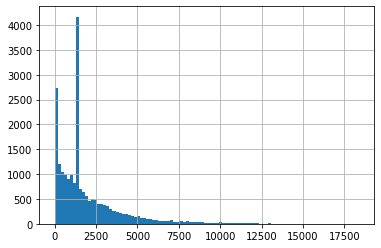

In [50]:
# CÓDIGO REVISOR
df['days_employed'] .hist(bins=100)

Ahora echemos un vistazo a la edad de clientes para ver si hay algún problema allí. Una vez más, piensa qué datos pueden ser extraños en esta columna, es decir, qué dato no puede ser la edad de alguien.]

In [51]:
df['dob_years'].unique()

array([42, 36, 33, 32, 53, 27, 43, 50, 35, 41, 40, 65, 54, 56, 26, 48, 24,
       21, 57, 67, 28, 63, 62, 47, 34, 68, 25, 31, 30, 20, 49, 37, 45, 61,
       64, 44, 52, 46, 23, 38, 39, 51,  0, 59, 29, 60, 55, 58, 71, 22, 73,
       66, 69, 19, 72, 70, 74, 75])

In [52]:
# Revisa `dob_years` en busca de valores sospechosos y cuenta el porcentaje
df_education = df['dob_years'].value_counts(normalize=True)*100
print(df_education)



35    2.871463
41    2.819936
40    2.815252
34    2.787146
38    2.782462
42    2.768409
33    2.702829
39    2.674724
31    2.599775
36    2.585722
29    2.538880
44    2.534195
48    2.506090
30    2.501405
37    2.482668
43    2.384298
50    2.379614
49    2.365561
32    2.365561
28    2.346824
45    2.314034
27    2.295297
52    2.262507
56    2.243770
47    2.234401
54    2.215664
46    2.187559
53    2.140716
58    2.136031
57    2.121979
51    2.089189
55    2.065767
59    2.061083
26    1.901818
60    1.747236
25    1.667604
61    1.648866
62    1.630129
63    1.255387
24    1.231966
64    1.217913
23    1.175754
65    0.908750
22    0.857223
66    0.852539
67    0.782275
21    0.515271
0     0.468428
68    0.463744
69    0.388795
70    0.304478
71    0.271688
20    0.238898
72    0.154581
19    0.065580
73    0.037474
74    0.028106
75    0.004684
Name: dob_years, dtype: float64


In [53]:
df[df['dob_years'] == 0] 

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
99,0,1354.905896,0,secondary education,1,married,0,F,retiree,0,11406.644,car
149,0,2664.273168,0,secondary education,1,divorced,3,F,employee,0,11228.230,housing transactions
270,3,1872.663186,0,secondary education,1,married,0,F,employee,0,16346.633,housing renovation
578,0,1354.905896,0,secondary education,1,married,0,F,retiree,0,15619.310,construction of own property
1040,0,1158.029561,0,bachelor's degree,0,divorced,3,F,business,0,48639.062,to own a car
...,...,...,...,...,...,...,...,...,...,...,...,...
19829,0,0.000000,0,secondary education,1,married,0,F,employee,0,NaN,housing
20462,0,1354.905896,0,secondary education,1,married,0,F,retiree,0,41471.027,purchase of my own house
20577,0,1354.905896,0,secondary education,1,unmarried,4,F,retiree,0,20766.202,property
21179,2,108.967042,0,bachelor's degree,0,married,0,M,business,0,38512.321,building a real estate


[Decide qué harás con los valores problemáticos y explica por qué.]

In [54]:
# Resuelve los problemas en la columna `dob_years`, si existen
# El problema es que enocntré un numero cero (0), el cual no es correcto, ya que segun las otras columnas, tiene experiencia laboral y no compete.
# No borraré datos, pero si reemplazare por la mediana.

df[df['dob_years'] > 0 ]
df_mayor_cero = df[df['dob_years'] > 0 ]
median_years_dob = df_mayor_cero['dob_years'].median()
df.loc[  df['dob_years'] == 0 ,  "dob_years"  ] = median_years_dob


/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

En este caso no eran tantos las filas con problemas, así que no es problema rellenar estas con el mismo valor
</div>

In [55]:
# Comprueba el resultado - asegúrate de que esté arreglado
df['dob_years'].unique()

array([42., 36., 33., 32., 53., 27., 43., 50., 35., 41., 40., 65., 54.,
       56., 26., 48., 24., 21., 57., 67., 28., 63., 62., 47., 34., 68.,
       25., 31., 30., 20., 49., 37., 45., 61., 64., 44., 52., 46., 23.,
       38., 39., 51., 59., 29., 60., 55., 58., 71., 22., 73., 66., 69.,
       19., 72., 70., 74., 75.])

[Ahora revisemos la columna `family_status`. Mira qué tipo de valores hay y qué problemas puedes tener que abordar.]

In [56]:
# Veamos los valores de la columna
df['family_status'].unique()


array(['married', 'civil partnership', 'widow / widower', 'divorced',
       'unmarried'], dtype=object)

In [57]:
# Aborda los valores problemáticos en `family_status`, si existen
#El único error que veo, es la palabra "unmarried", ya que lo legal seria "single"

df.loc[df['family_status'] == 'unmarried','family_status'] = 'single'


In [58]:
# Comprueba el resultado - asegúrate de que esté arreglado
df['family_status'].unique()

array(['married', 'civil partnership', 'widow / widower', 'divorced',
       'single'], dtype=object)

[Ahora revisemos la columna `gender`. Mira qué tipo de valores hay y qué problemas puedes tener que abordar]

In [59]:
# Veamos los valores en la columna
df['gender'].unique()

array(['F', 'M', 'XNA'], dtype=object)

In [60]:
# Aborda los valores problemáticos, si existen
# XNA parece un ddato sospechoso, pero por condiciones de genero, se deja, y no se hara ninguna modificacion.
df[df['gender'] == 'XNA']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
10701,0,2358.600502,24.0,some college,2,civil partnership,1,XNA,business,0,32624.825,buy real estate


<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Ok, se puede dejar, eliminar o modificar. Es una sola fila, por lo tanto, cualquier acción no cambiará mucho lo que se pueda hacer con la data.
</div>

In [61]:
# Comprueba el resultado - asegúrate de que esté arreglado
#No hay ningun cambio


[Ahora vamos a revisar la columna `income_type`. Mira qué tipo de valores hay y qué problemas puedes tener que abordar]

In [62]:
# Veamos los valores en la columna
df['income_type'].unique()

array(['employee', 'retiree', 'business', 'civil servant', 'unemployed',
       'entrepreneur', 'student', 'paternity / maternity leave'],
      dtype=object)

In [63]:
# Aborda los valores problemáticos, si existen
#No se observa ningun valor problematico, por lo que no puedo abordar, no aplica.

[Ahora veamos si hay duplicados en nuestros datos. Si los hay, tendrás que decidir qué harás con ellos y explicar por qué.]

In [64]:
# Comprobar los duplicados
df[df.duplicated()]
#Si existen, esto puede ocurrir por errores en la consolidación de datos de diferentes fuentes.
#Eliminaré las filas duplicadas por completo para quedarme solo con instance únicas de cada cliente. Utilizaré el método drop_duplicates() y mantendré el primer occurrence.

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
3290,0,0.0,58.0,secondary education,1,civil partnership,1,F,retiree,0,NaN,to have a wedding
6312,0,0.0,30.0,secondary education,1,married,0,M,employee,0,NaN,building a real estate
7921,0,0.0,64.0,bachelor's degree,0,civil partnership,1,F,retiree,0,NaN,having a wedding
7938,0,0.0,71.0,secondary education,1,civil partnership,1,F,retiree,0,NaN,having a wedding
9604,0,0.0,71.0,secondary education,1,civil partnership,1,F,retiree,0,NaN,having a wedding
9855,0,0.0,62.0,secondary education,1,married,0,F,retiree,0,NaN,to get a supplementary education
14097,0,0.0,48.0,secondary education,1,civil partnership,1,F,employee,0,NaN,wedding ceremony
14728,0,0.0,46.0,secondary education,1,civil partnership,1,F,employee,0,NaN,buying property for renting out
15991,0,0.0,51.0,secondary education,1,civil partnership,1,F,business,0,NaN,having a wedding
16204,0,0.0,56.0,secondary education,1,married,0,F,retiree,0,NaN,to buy a car


In [65]:
# Aborda los duplicados, si existen
df = df.drop_duplicates()
df

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42.0,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,4024.803754,36.0,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,5623.422610,33.0,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,4124.747207,32.0,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,1354.905896,53.0,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529.316663,43.0,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions
21521,0,1354.905896,67.0,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car
21522,1,2113.346888,38.0,secondary education,1,civil partnership,1,M,employee,1,14347.610,property
21523,3,3112.481705,38.0,secondary education,1,married,0,M,employee,1,39054.888,buying my own car


In [66]:
# Última comprobación para ver si tenemos duplicados
df[df.duplicated()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose


In [67]:
# Comprueba el tamaño del conjunto de datos que tienes ahora, después de haber ejecutado estas primeras manipulaciones
df.shape

(21331, 12)

[Describe tu nuevo conjunto de datos: di brevemente qué has cambiado y cuál es el porcentaje de cambios, si hubo alguno.]


In [68]:
#Parece que había algunas filas repetidas en los datos. El número total de entradas ha disminuido de 21525 a 21471. Utilicé drop_duplicates() para eliminar los duplicados, lo que me ahorró la molestia de comprobar manualmente si hay duplicados. Es importante identificar la razón detrás de estos duplicados.
# Podrían haber diferentes razones, pero a mi parecer pudo haber sido el resultado de que los usuarios enviaran sus datos varias veces o de la replicación de los datos que se añaden a la base de datos.
# En cualquier caso, esta repetición no debería haberse producido, y menos hasta este punto.

<div class="alert alert-block alert-danger">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Por favor agrega más comentarios al desarrollo, en particular donde es indicado
</div>

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer v2</b> <a class="tocSkip"></a>

Ok, bien.
</div>

# Trabajar con valores ausentes

[Para acelerar el trabajo con algunos datos, puede que necesites trabajar con diccionarios para algunos valores, en los que se proporcionan IDs. Explica por qué y con qué diccionarios vas a trabajar.]

In [69]:
# Encuentra los diccionarios
genero_dicc = {
    "F": 1,
    "M": 2
}

genero_dicc

{'F': 1, 'M': 2}

### Restaurar valores ausentes en `total_income`

[Indica brevemente qué columnas tienen valores ausentes que debes abordar. Explica cómo las arreglarás.]


[Empieza por abordar los valores ausentes del ingreso total. Crea una categoría de edad para los clientes. Crea una nueva columna con la categoría de edad. Esta estrategia puede ayudar a calcular valores para el ingreso total.]


In [70]:
# Crear una nueva columna basada en la función
df['age_category'] = pd.NA

df.loc[ (df["dob_years"] > 18) & (df["dob_years"] < 60) , "age_category" ] = "second age"
df.loc[ (df["dob_years"] >= 60) , "age_category" ] = "third age"
df

/tmp/ipykernel_80/153839704.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_category'] = pd.NA
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_category
0,1,8437.673028,42.0,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,second age
1,1,4024.803754,36.0,secondary education,1,married,0,F,employee,0,17932.802,car purchase,second age
2,0,5623.422610,33.0,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,second age
3,3,4124.747207,32.0,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,second age
4,0,1354.905896,53.0,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,second age
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529.316663,43.0,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions,second age
21521,0,1354.905896,67.0,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car,third age
21522,1,2113.346888,38.0,secondary education,1,civil partnership,1,M,employee,1,14347.610,property,second age
21523,3,3112.481705,38.0,secondary education,1,married,0,M,employee,1,39054.888,buying my own car,second age


In [71]:
# Comprobar cómo los valores en la nueva columna
df['age_category'].unique()


array(['second age', 'third age'], dtype=object)

[Piensa en los factores de los que suelen depender los ingresos. Eventualmente, tendrás que averiguar si debes usar valores medios o medianos para reemplazar los valores ausentes. Para tomar esta decisión, probablemente querrás ver la distribución de los factores que, según tu análisis, pueden tener un impacto en los ingresos de uno.]

[Crea una tabla que solo tenga datos sin valores ausentes. Estos datos se utilizarán para restaurar los valores ausentes.]

In [72]:
# Crea una tabla sin valores ausentes y muestra algunas de sus filas para asegurarte de que se ve bien

df1 = df[~df['total_income'].isna()]

In [73]:
# Examina los valores medios de los ingresos en función de los factores que identificaste
df.groupby('education')['total_income'].mean()

education
bachelor's degree      33167.337459
graduate degree        27960.024667
primary education      21144.882211
secondary education    24587.986103
some college           29039.304112
Name: total_income, dtype: float64

In [74]:
df.groupby('income_type')['total_income'].mean()

income_type
business                       32413.731796
civil servant                  27318.902910
employee                       25818.401986
entrepreneur                   79866.103000
paternity / maternity leave     8612.661000
retiree                        21951.754892
student                        15712.260000
unemployed                     21014.360500
Name: total_income, dtype: float64

In [75]:
df.groupby('dob_years')['total_income'].mean()

dob_years
19.0    16993.942462
20.0    20318.927348
21.0    22977.797761
22.0    22374.508572
23.0    22215.892181
24.0    24104.454393
25.0    25211.566611
26.0    25293.127000
27.0    28326.093284
28.0    26340.011365
29.0    27118.692120
30.0    27492.347603
31.0    27894.733650
32.0    26769.243844
33.0    29119.468753
34.0    28490.669653
35.0    28466.247208
36.0    29079.276222
37.0    29291.029801
38.0    26971.856375
39.0    29480.114443
40.0    28318.353594
41.0    28397.905851
42.0    29578.980475
43.0    28828.983335
44.0    28474.087749
45.0    27746.022320
46.0    29927.507026
47.0    27085.061746
48.0    28419.972210
49.0    28180.173255
50.0    26493.051434
51.0    27222.511268
52.0    26889.447151
53.0    26809.508819
54.0    25049.014812
55.0    24881.267896
56.0    25771.840033
57.0    24902.762729
58.0    25184.870919
59.0    24729.754767
60.0    22816.682873
61.0    24271.449441
62.0    23792.469486
63.0    22877.081971
64.0    25939.872195
65.0    24274.798201
66.

In [76]:
df.groupby('family_status')['total_income'].mean()

family_status
civil partnership    26697.546301
divorced             27231.857378
married              27035.029687
single               26973.898102
widow / widower      22975.646966
Name: total_income, dtype: float64

In [77]:
# Examina los valores medianos de los ingresos en función de los factores que identificaste
df.groupby('education')['total_income'].median()

education
bachelor's degree      28086.5425
graduate degree        25161.5835
primary education      18741.9760
secondary education    21829.3420
some college           25664.1810
Name: total_income, dtype: float64

In [78]:
df.groupby('income_type')['total_income'].median()

income_type
business                       27602.7875
civil servant                  24067.2240
employee                       22814.0140
entrepreneur                   79866.1030
paternity / maternity leave     8612.6610
retiree                        18956.9340
student                        15712.2600
unemployed                     21014.3605
Name: total_income, dtype: float64

In [79]:
df.groupby('dob_years')['total_income'].median()

dob_years
19.0    14934.9010
20.0    17520.3290
21.0    20123.9370
22.0    19839.3410
23.0    19727.8860
24.0    22525.2360
25.0    22899.0990
26.0    23273.8750
27.0    24532.6330
28.0    23946.0940
29.0    23513.2790
30.0    23511.1470
31.0    23940.0420
32.0    24200.6250
33.0    25101.1935
34.0    24857.4340
35.0    24983.2600
36.0    25369.9430
37.0    25649.3720
38.0    24289.4270
39.0    23908.6645
40.0    25403.9850
41.0    23770.1140
42.0    25466.8790
43.0    24182.6095
44.0    24368.4640
45.0    24661.7550
46.0    25240.8510
47.0    24495.6710
48.0    25547.8155
49.0    24617.0360
50.0    22705.4670
51.0    23170.5815
52.0    22707.5650
53.0    22449.8080
54.0    21916.8200
55.0    21299.6570
56.0    22184.6000
57.0    22170.5290
58.0    21466.1100
59.0    21803.0145
60.0    20185.7630
61.0    20629.8410
62.0    21180.8130
63.0    19764.1540
64.0    21372.1895
65.0    19669.4650
66.0    17867.7550
67.0    18024.9680
68.0    18113.3420
69.0    16315.2395
70.0    18889.9720
71

In [80]:
df.groupby('family_status')['total_income'].median()

family_status
civil partnership    23186.5340
divorced             23671.0585
married              23371.4550
single               23187.4640
widow / widower      20504.5065
Name: total_income, dtype: float64

In [81]:
# Con la media vemos datos que no difieren tanto, no hay valores atipicos en los factores que estamos observando
# Los valores de la mediana no son valores tan distintos a la media

[Repite tales comparaciones para múltiples factores. Asegúrate de considerar diferentes aspectos y explica tu razonamiento.]



[Determina qué características definen mejor los ingresos y decide si utilizarás una mediana o una media. Explica por qué tomaste esta decisión.]


In [82]:
# La caracteristicas principales son el nivel de educacion de la persona y el tipo de ingreso, que determina el total de sus ingresos
#Y utilizare la median, ya que la distribucion de la informacion, no existe diferencias abruptas entre la informacion
        

In [83]:
# Aplícalo a cada fila

df_grouped = df.groupby('education')['total_income'].median().reset_index()
df['total_income'] = df.apply(lambda x: df_grouped.loc[df_grouped['education']==x['education'], 'total_income'].item()
                             if pd.isna(x['total_income']) 
                             else x['total_income'], axis=1)
print(df['total_income'])

0        40620.102
1        17932.802
2        23341.752
3        42820.568
4        25378.572
           ...    
21520    35966.698
21521    24959.969
21522    14347.610
21523    39054.888
21524    13127.587
Name: total_income, Length: 21331, dtype: float64


/tmp/ipykernel_80/177112287.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_income'] = df.apply(lambda x: df_grouped.loc[df_grouped['education']==x['education'], 'total_income'].item()


<div class="alert alert-block alert-danger">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Como mencioné anteriormente, rellenar los nulos con un solo valor provoca que la data quede sesgada a ese valor. Debes reemplazarlo por la mediana condicionada por alguna otra variable, por ejemplo para cada nivel de educación, agrupas sobre esa variable y calculas la mediana y eso lo utilizar para reemplazar los nulso dependiendo del valor de nivel de educación de la fila.
</div>

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer v2</b> <a class="tocSkip"></a>

Muy bien, corregido! 
</div>

In [84]:
# Comprueba si tenemos algún error
df[df['total_income'].isna()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_category


[Si has encontrado errores al preparar los valores para los datos ausentes, probablemente signifique que hay algo especial en los datos de la categoría. Piénsalo un poco: tal vez hará falta arreglar algunas cosas manualmente, si hay suficientes datos para encontrar medianas/medias.]


In [85]:
# Reemplazar los valores ausentes si hay algún error
#No encontre ninguno, no hay errores

[Cuando creas que has terminado con `total_income`, comprueba que el número total de valores en esta columna coincida con el número de valores en otras columnas.]

In [86]:
# Comprobar el número de entradas en las columnas
df.describe()


,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21331.000000,21331.000000,21331.000000,21331.000000,21331.000000,21331.000000,21331.000000
mean,0.474005,1962.289536,43.479537,0.816980,0.974497,0.081196,26470.481984
std,0.752378,2118.112637,12.219530,0.549282,1.421787,0.273143,15721.640086
min,0.000000,0.000000,19.000000,0.000000,0.000000,0.000000,3306.762000
25%,0.000000,623.273516,33.000000,1.000000,0.000000,0.000000,17201.214500
50%,0.000000,1354.905896,43.000000,1.000000,0.000000,0.000000,22584.950000
75%,1.000000,2522.166170,53.000000,1.000000,1.000000,0.000000,31333.111000
max,5.000000,18388.949901,75.000000,4.000000,4.000000,1.000000,362496.645000


###  Restaurar valores en `days_employed`

[Piensa en los parámetros que pueden ayudarte a restaurar los valores ausentes en esta columna. Eventualmente, tendrás que averiguar si debes usar valores medios o medianos para reemplazar los valores ausentes. Probablemente llevarás a cabo una investigación similar a la que realizaste cuando restauraste los datos en la columna anterior.]

In [87]:
df['days_employed'] = df['days_employed'].astype(int)
df

/tmp/ipykernel_80/1778131986.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_employed'] = df['days_employed'].astype(int)


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_category
0,1,8437,42.0,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,second age
1,1,4024,36.0,secondary education,1,married,0,F,employee,0,17932.802,car purchase,second age
2,0,5623,33.0,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,second age
3,3,4124,32.0,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,second age
4,0,1354,53.0,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,second age
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529,43.0,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions,second age
21521,0,1354,67.0,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car,third age
21522,1,2113,38.0,secondary education,1,civil partnership,1,M,employee,1,14347.610,property,second age
21523,3,3112,38.0,secondary education,1,married,0,M,employee,1,39054.888,buying my own car,second age


In [88]:
# Distribución de las medianas de `days_employed` en función de los parámetros identificados

df.groupby('education')['days_employed'].median()



education
bachelor's degree      1354.0
graduate degree        1852.5
primary education      1354.0
secondary education    1354.0
some college           1048.0
Name: days_employed, dtype: float64

In [89]:
df.groupby('income_type')['days_employed'].median()

income_type
business                       1320
civil servant                  2389
employee                       1364
entrepreneur                    260
paternity / maternity leave    3296
retiree                        1354
student                         578
unemployed                     1354
Name: days_employed, dtype: int64

In [90]:
df.groupby('dob_years')['days_employed'].median()

dob_years
19.0     709.5
20.0     598.0
21.0     483.5
22.0     614.0
23.0     569.5
24.0     846.0
25.0     869.0
26.0     975.0
27.0    1069.0
28.0     965.0
29.0    1195.0
30.0    1269.0
31.0    1123.0
32.0    1299.0
33.0    1286.0
34.0    1413.0
35.0    1426.0
36.0    1480.0
37.0    1515.5
38.0    1496.5
39.0    1645.0
40.0    1374.0
41.0    1572.0
42.0    1786.0
43.0    1426.0
44.0    1638.0
45.0    1740.0
46.0    1815.5
47.0    1682.0
48.0    1894.0
49.0    1712.0
50.0    1506.0
51.0    1354.0
52.0    1354.0
53.0    1354.0
54.0    1354.0
55.0    1354.0
56.0    1354.0
57.0    1354.0
58.0    1354.0
59.0    1354.0
60.0    1354.0
61.0    1354.0
62.0    1354.0
63.0    1354.0
64.0    1354.0
65.0    1354.0
66.0    1354.0
67.0    1354.0
68.0    1354.0
69.0    1354.0
70.0    1354.0
71.0    1354.0
72.0    1354.0
73.0    1354.0
74.0    1354.0
75.0    1678.0
Name: days_employed, dtype: float64

In [91]:
df.groupby('family_status')['days_employed'].median()

family_status
civil partnership    1354.0
divorced             1354.0
married              1354.0
single               1254.5
widow / widower      1354.0
Name: days_employed, dtype: float64

In [92]:
# Distribución de las medias de `days_employed` en función de los parámetros identificados

df.groupby('education')['days_employed'].mean()

education
bachelor's degree      1955.233212
graduate degree        2798.000000
primary education      1602.372340
secondary education    1998.017380
some college           1400.570850
Name: days_employed, dtype: float64

In [93]:
df.groupby('income_type')['days_employed'].mean()

income_type
business                       1909.219338
civil servant                  3065.313577
employee                       2098.323014
entrepreneur                    260.000000
paternity / maternity leave    3296.000000
retiree                        1217.960651
student                         578.000000
unemployed                     1354.000000
Name: days_employed, dtype: float64

In [94]:
df.groupby('dob_years')['days_employed'].mean()

dob_years
19.0     587.928571
20.0     617.352941
21.0     591.390909
22.0     711.469945
23.0     716.236000
24.0     940.117871
25.0    1020.665730
26.0    1093.544335
27.0    1259.738776
28.0    1235.586826
29.0    1413.184502
30.0    1521.403377
31.0    1464.446847
32.0    1607.669307
33.0    1696.175043
34.0    1750.796639
35.0    1900.784666
36.0    2003.195652
37.0    1968.977358
38.0    2088.602694
39.0    2192.201401
40.0    2086.846922
41.0    2187.880200
42.0    2468.245347
43.0    2176.582923
44.0    2565.661738
45.0    2474.468560
46.0    2547.152361
47.0    2571.213836
48.0    2608.365169
49.0    2696.633663
50.0    2606.606299
51.0    2448.592342
52.0    2534.656315
53.0    2529.153173
54.0    2164.376321
55.0    2381.521542
56.0    2211.579498
57.0    2056.609272
58.0    2038.660793
59.0    2137.959091
60.0    1847.270777
61.0    1975.355114
62.0    1602.587896
63.0    1750.414179
64.0    1697.127907
65.0    1753.253886
66.0    1548.302198
67.0    1481.353293
68.0    15

In [95]:
df.groupby('family_status')['days_employed'].mean()

family_status
civil partnership    1898.007257
divorced             2032.870479
married              2061.908409
single               1609.687411
widow / widower      1894.222923
Name: days_employed, dtype: float64

[Decide qué vas a utilizar: medias o medianas. Explica por qué.]

In [96]:
df2 = df[~df['days_employed'].isna()]

In [97]:
# Aplicar la función al days_employed

df_grouped = df.groupby('education')['days_employed'].median().reset_index()
df['days_employed'] = df.apply(lambda x: df_grouped.loc[df_grouped['education']==x['education'], 'days_employed'].item()
                             if pd.isna(x['days_employed']) 
                             else x['days_employed'], axis=1)
print(df['days_employed'])




0        8437
1        4024
2        5623
3        4124
4        1354
         ... 
21520    4529
21521    1354
21522    2113
21523    3112
21524    1984
Name: days_employed, Length: 21331, dtype: int64


/tmp/ipykernel_80/1772514083.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_employed'] = df.apply(lambda x: df_grouped.loc[df_grouped['education']==x['education'], 'days_employed'].item()


<div class="alert alert-block alert-danger">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Mismo comentario que para la parte anterior
    
</div>

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer v2</b> <a class="tocSkip"></a>

Muy bien, corregido!
</div>

In [98]:
# Comprueba si la función funcionó
df[df['days_employed'].isna()]


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_category


In [99]:
# Reemplazar valores ausentes
#No se encontraron valores ausentes


[Cuando creas que has terminado con `total_income`, comprueba que el número total de valores en esta columna coincida con el número de valores en otras columnas.]

In [100]:
# Comprueba las entradas en todas las columnas: asegúrate de que hayamos corregido todos los valores ausentes
df.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21331.000000,21331.000000,21331.000000,21331.000000,21331.000000,21331.000000,21331.000000
mean,0.474005,1961.773757,43.479537,0.816980,0.974497,0.081196,26470.481984
std,0.752378,2118.089035,12.219530,0.549282,1.421787,0.273143,15721.640086
min,0.000000,0.000000,19.000000,0.000000,0.000000,0.000000,3306.762000
25%,0.000000,623.000000,33.000000,1.000000,0.000000,0.000000,17201.214500
50%,0.000000,1354.000000,43.000000,1.000000,0.000000,0.000000,22584.950000
75%,1.000000,2521.500000,53.000000,1.000000,1.000000,0.000000,31333.111000
max,5.000000,18388.000000,75.000000,4.000000,4.000000,1.000000,362496.645000


<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Ok, aquí los datos ya no tienen nulos, pero se debe corregir en base los comentarios señalados
</div>

## Clasificación de datos

[Para poder responder a las preguntas y probar las diferentes hipótesis, querrás trabajar con datos clasificados. Mira las preguntas formuladas que debes responder. Piensa qué parte de los datos tiene que ser clasificada para responder a estas preguntas. A continuación, encontrarás una plantilla a través de la cual puedes trabajar para clasificar los datos. El primer procesamiento paso a paso cubre los datos de texto; el segundo aborda los datos numéricos que necesitan ser clasificados. Puedes usar ambas o ninguna de las instrucciones sugeridas, eso solo depende de ti.]

[Independientemente de cómo decidas abordar la clasificación, asegúrate de proporcionar una explicación clara de la razón por la que tomaste tu decisión. Recuerda: este es tu trabajo y aquí tú tomas todas las decisiones.]


In [101]:
# Muestra los valores de los datos seleccionados para la clasificación

df

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_category
0,1,8437,42.0,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,second age
1,1,4024,36.0,secondary education,1,married,0,F,employee,0,17932.802,car purchase,second age
2,0,5623,33.0,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,second age
3,3,4124,32.0,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,second age
4,0,1354,53.0,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,second age
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529,43.0,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions,second age
21521,0,1354,67.0,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car,third age
21522,1,2113,38.0,secondary education,1,civil partnership,1,M,employee,1,14347.610,property,second age
21523,3,3112,38.0,secondary education,1,married,0,M,employee,1,39054.888,buying my own car,second age


[Vamos a comprobar los valores únicos]

In [102]:
# Comprobar los valores únicos
print(df['education'].unique())
print("*"*20)
print(df['income_type'].unique())
print("*"*20)
print(df['family_status'].unique())
print("*"*20)


["bachelor's degree" 'secondary education' 'some college'
 'primary education' 'graduate degree']
********************
['employee' 'retiree' 'business' 'civil servant' 'unemployed'
 'entrepreneur' 'student' 'paternity / maternity leave']
********************
['married' 'civil partnership' 'widow / widower' 'divorced' 'single']
********************


[¿Qué grupos principales puedes identificar en función de los valores únicos?]

[Según estos temas, probablemente querremos clasificar nuestros datos.]


In [103]:
# Escribamos una función para clasificar los datos en función de temas comunes
def clasificar_educacion(nivel):
  if nivel in ['primary education', 'secondary education']:
    return 'básica'
  elif nivel == "bachelor's degree":
    return 'superior'
  else:
    return 'posgrado'

df['educ_clasificada'] = df['education'].apply(clasificar_educacion)


/tmp/ipykernel_80/2675620987.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['educ_clasificada'] = df['education'].apply(clasificar_educacion)


In [104]:
# Crea una columna con las categorías y cuenta los valores en ellas
df['educ_clasificada'] = df['education'].apply(clasificar_educacion)
df['educ_clasificada'].value_counts()

conteos = df['educ_clasificada'].value_counts().reset_index()
conteos.columns = ['categoria', 'conteo']
print(conteos)


  categoria  conteo
0    básica   15357
1  superior    5227
2  posgrado     747


/tmp/ipykernel_80/2014948702.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['educ_clasificada'] = df['education'].apply(clasificar_educacion)


In [105]:
df["purpose"].unique().tolist()

['purchase of the house',
 'car purchase',
 'supplementary education',
 'to have a wedding',
 'housing transactions',
 'education',
 'having a wedding',
 'purchase of the house for my family',
 'buy real estate',
 'buy commercial real estate',
 'buy residential real estate',
 'construction of own property',
 'property',
 'building a property',
 'buying a second-hand car',
 'buying my own car',
 'transactions with commercial real estate',
 'building a real estate',
 'housing',
 'transactions with my real estate',
 'cars',
 'to become educated',
 'second-hand car purchase',
 'getting an education',
 'car',
 'wedding ceremony',
 'to get a supplementary education',
 'purchase of my own house',
 'real estate transactions',
 'getting higher education',
 'to own a car',
 'purchase of a car',
 'profile education',
 'university education',
 'buying property for renting out',
 'to buy a car',
 'housing renovation',
 'going to university']

In [106]:
def clasificar_purpose(purpose):
  if purpose in ['purchase of the house', 'housing transactions', 'purchase of the house for my family', 'buy real estate', 'buy commercial real estate', 'buy residential real estate', 'construction of own property', 'property', 'building a property', 'transactions with commercial real estate', 'purchase of my own house','real estate transactions', 'buying property for renting out', 'housing renovation' ]:
    return 'real estate'
  elif purpose in ['to own a car', 'car purchase', 'to buy a car', 'cars', 'car purchase', 'buying a second-hand car', 'buying my own car', 'purchase of a car' ]:
    return 'car'
  elif purpose in ['education', 'going to university', 'to get a supplementary education', 'getting higher education','profile education', 'university education' ]:
    return 'education'
  elif purpose in ['to have a wedding', 'having a wedding', 'wedding ceremony']:
    return 'wedding'

In [107]:
df['purpose_clasificada'] = df["purpose"].apply(clasificar_purpose)

/tmp/ipykernel_80/1090347778.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['purpose_clasificada'] = df["purpose"].apply(clasificar_purpose)


In [108]:
df['purpose_clasificada'] = df["purpose"].apply(clasificar_purpose)
df['purpose_clasificada'].value_counts()

/tmp/ipykernel_80/1436734875.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['purpose_clasificada'] = df["purpose"].apply(clasificar_purpose)


real estate    8867
car            3307
education      2685
wedding        2313
Name: purpose_clasificada, dtype: int64

[Si decides clasificar los datos numéricos, también tendrás que crear las categorías para ello.]

count     21331.000000
mean      26470.481984
std       15721.640086
min        3306.762000
25%       17201.214500
50%       22584.950000
75%       31333.111000
max      362496.645000
Name: total_income, dtype: float64


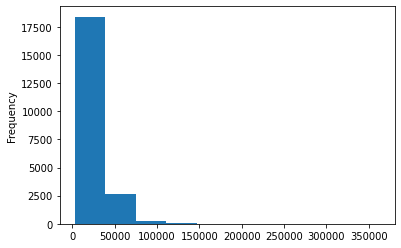

In [109]:
# Revisar todos los datos numéricos en la columna seleccionada para la clasificación
df['total_income'].plot.hist()
print(df['total_income'].describe())

In [110]:
df[df['total_income'] > df['total_income'].quantile(0.95)]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_category,educ_clasificada,purpose_clasificada
39,0,650,31.0,bachelor's degree,0,civil partnership,1,F,business,0,120678.528,to become educated,second age,superior,None
47,1,2689,33.0,bachelor's degree,0,civil partnership,1,M,civil servant,0,57004.465,having a wedding,second age,superior,wedding
58,0,335,36.0,bachelor's degree,0,married,0,M,employee,0,66304.672,property,second age,superior,real estate
62,0,7845,48.0,bachelor's degree,0,single,4,M,civil servant,0,69662.111,getting higher education,second age,superior,education
68,2,2152,46.0,bachelor's degree,0,married,0,M,business,0,94731.434,transactions with commercial real estate,second age,superior,real estate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21430,0,170,41.0,secondary education,1,married,0,F,employee,1,56143.673,purchase of a car,second age,básica,car
21472,2,2768,39.0,bachelor's degree,0,married,0,F,business,0,58030.629,cars,second age,superior,car
21476,0,2539,52.0,bachelor's degree,0,married,0,M,business,0,84392.453,transactions with my real estate,second age,superior,None
21481,0,829,30.0,some college,2,civil partnership,1,M,employee,0,70475.341,to buy a car,second age,posgrado,car


In [111]:
# Obtener estadísticas resumidas para la columna

stats = df['total_income'].describe()

print(stats)

count     21331.000000
mean      26470.481984
std       15721.640086
min        3306.762000
25%       17201.214500
50%       22584.950000
75%       31333.111000
max      362496.645000
Name: total_income, dtype: float64


[Decide qué rangos utilizarás para agrupar y explica por qué.]

In [112]:
# Crear una función para clasificar en diferentes grupos numéricos basándose en rangos
quantile_0_25 = df['total_income'].quantile(0.25)
quantile_0_50 = df['total_income'].quantile(0.50)
quantile_0_75 = df['total_income'].quantile(0.75)


def clasificar_ingresos(ingreso):
  if ingreso < quantile_0_25:
    return 'bajo'
  elif ingreso < quantile_0_50:
    return 'medio'
  elif ingreso < quantile_0_75: 
    return 'alto'
  else:
    return 'muy alto'



In [113]:
# Crear una columna con categorías
df['ingreso_categoria'] = df['total_income'].apply(clasificar_ingresos)
df

/tmp/ipykernel_80/645508077.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ingreso_categoria'] = df['total_income'].apply(clasificar_ingresos)


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_category,educ_clasificada,purpose_clasificada,ingreso_categoria
0,1,8437,42.0,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,second age,superior,real estate,muy alto
1,1,4024,36.0,secondary education,1,married,0,F,employee,0,17932.802,car purchase,second age,básica,car,medio
2,0,5623,33.0,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,second age,básica,real estate,alto
3,3,4124,32.0,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,second age,básica,None,muy alto
4,0,1354,53.0,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,second age,básica,wedding,alto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529,43.0,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions,second age,básica,real estate,muy alto
21521,0,1354,67.0,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car,third age,básica,car,alto
21522,1,2113,38.0,secondary education,1,civil partnership,1,M,employee,1,14347.610,property,second age,básica,real estate,bajo
21523,3,3112,38.0,secondary education,1,married,0,M,employee,1,39054.888,buying my own car,second age,básica,car,muy alto


<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Muy bien!
</div>

In [114]:
# Contar los valores de cada categoría para ver la distribución
conteos = df['educ_clasificada'].value_counts()
print(conteos)

conteos1 = df['purpose_clasificada'].value_counts()
print(conteos1)

básica      15357
superior     5227
posgrado      747
Name: educ_clasificada, dtype: int64
real estate    8867
car            3307
education      2685
wedding        2313
Name: purpose_clasificada, dtype: int64


## Comprobación de las hipótesis


**¿Existe una correlación entre tener hijos y pagar a tiempo?**

In [115]:
df[df["debt"] == 1]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_category,educ_clasificada,purpose_clasificada,ingreso_categoria
14,0,1844,56.0,bachelor's degree,0,civil partnership,1,F,business,1,26420.466,buy residential real estate,second age,superior,real estate,alto
32,0,4649,34.0,secondary education,1,civil partnership,1,F,employee,1,22249.194,having a wedding,second age,básica,wedding,medio
38,0,597,25.0,bachelor's degree,0,single,4,M,employee,1,30759.568,education,second age,superior,education,alto
55,0,0,54.0,secondary education,1,civil partnership,1,F,retiree,1,21829.342,to have a wedding,second age,básica,wedding,medio
75,1,2953,38.0,secondary education,1,married,0,M,employee,1,13109.661,real estate transactions,second age,básica,real estate,bajo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21494,0,960,39.0,secondary education,1,civil partnership,1,M,business,1,28219.135,supplementary education,second age,básica,None,alto
21511,0,612,29.0,bachelor's degree,0,civil partnership,1,F,employee,1,22410.956,buying property for renting out,second age,superior,real estate,medio
21515,1,467,28.0,secondary education,1,married,0,F,employee,1,17517.812,to become educated,second age,básica,None,medio
21522,1,2113,38.0,secondary education,1,civil partnership,1,M,employee,1,14347.610,property,second age,básica,real estate,bajo


In [116]:
# Comprueba los datos sobre los hijos y los pagos puntuales
df['pago_tiempo'] = df['debt'].apply(lambda x: 1 if x==0 else 0)
df.groupby('children')['pago_tiempo'].mean()*100

# Calcular la tasa de incumplimiento en función del número de hijos

grouped = df.groupby('children')
for name, group in grouped:
    total = len(group)
    ontime = (group['pago_tiempo'] == 1).sum()
    tasa_incumplimiento = 1 - ontime / total
    print(f"Hijos: {name} - Tasa de incumplimiento: {tasa_incumplimiento:.2%}")

Hijos: 0 - Tasa de incumplimiento: 7.54%
Hijos: 1 - Tasa de incumplimiento: 9.23%
Hijos: 2 - Tasa de incumplimiento: 9.45%
Hijos: 3 - Tasa de incumplimiento: 8.18%
Hijos: 4 - Tasa de incumplimiento: 9.76%
Hijos: 5 - Tasa de incumplimiento: 0.00%


/tmp/ipykernel_80/1266344681.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pago_tiempo'] = df['debt'].apply(lambda x: 1 if x==0 else 0)


**Conclusión**

[Escribe tus conclusiones en base a tus manipulaciones y observaciones.]


In [117]:
## Al agrupar los datos por número de hijos y calcular la tasa de impago para cada grupo, es subjetivo y se observa que no hay diferencias significativas entre la cantidad de hijos y la tasa de incumpliento, porque lo que se concluye que no hay correlación.

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Muy bien! concuerdo contigo, hay diferencias pero son leves. Tal vez habría que investigar más para dar una respuesta categórica.
</div>

**¿Existe una correlación entre la situación familiar y el pago a tiempo?**

In [118]:
# Comprueba los datos del estado familiar y los pagos a tiempo
df['pago_tiempo'] = df['debt'].apply(lambda x: 1 if x==0 else 0)
df.groupby('family_status')['pago_tiempo'].mean()


# Calcular la tasa de incumplimiento basada en el estado familiar
grouped1 = df.groupby('family_status')
for name, group in grouped1:
    total = len(group)
    ontime = (group['pago_tiempo'] == 1).sum()
    tasa_incumplimiento = 1 - ontime / total
    print(f"Estado familiar: {name} - Tasa de incumplimiento: {tasa_incumplimiento:.2%}")


Estado familiar: civil partnership - Tasa de incumplimiento: 9.31%
Estado familiar: divorced - Tasa de incumplimiento: 7.06%
Estado familiar: married - Tasa de incumplimiento: 7.56%
Estado familiar: single - Tasa de incumplimiento: 9.76%
Estado familiar: widow / widower - Tasa de incumplimiento: 6.62%


/tmp/ipykernel_80/2006978401.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pago_tiempo'] = df['debt'].apply(lambda x: 1 if x==0 else 0)


**Conclusión**

[Escribe tus conclusiones en base a tus manipulaciones y observaciones.]

In [119]:
## Segmenté los datos por estado civil y calculé la tasa de impago para solteros, casados, divorciados, etc. Los solteros y union civil presentan las tasas más altas de impago. Los viudos/viudas tienen la menor tasa. Por tanto, se observa una conexión entre estar viudos/viudas y una mayor probabilidad de pago a tiempo. No es posible argumentar objetivamente que hay relacion entre el estado civil y la tasa de incumplimiento.

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Bien!
</div>

**¿Existe una correlación entre el nivel de ingresos y el pago a tiempo?**

In [120]:
# Comprueba los datos del nivel de ingresos y los pagos a tiempo
df['pago_tiempo'] = df['debt'].apply(lambda x: 1 if x==0 else 0)
df.groupby('ingreso_categoria')['pago_tiempo'].mean()

# Calcular la tasa de incumplimiento basada en el nivel de ingresos
grouped2 = df.groupby('ingreso_categoria')
for name, group in grouped2:
    total = len(group)
    ontime = (group['pago_tiempo'] == 1).sum()
    tasa_incumplimiento = 1 - ontime / total
    print(f"Nivel de ingreso: {name} - Tasa de incumplimiento: {tasa_incumplimiento:.2%}")


Nivel de ingreso: alto - Tasa de incumplimiento: 8.51%
Nivel de ingreso: bajo - Tasa de incumplimiento: 8.01%
Nivel de ingreso: medio - Tasa de incumplimiento: 8.81%
Nivel de ingreso: muy alto - Tasa de incumplimiento: 7.14%


/tmp/ipykernel_80/319123345.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pago_tiempo'] = df['debt'].apply(lambda x: 1 if x==0 else 0)


**Conclusión**

[Escribe tus conclusiones en base a tus manipulaciones y observaciones.]

In [121]:
## Segun la clasificacion, no hay una diferencia significativa segun los niveles de ingreso. Clasifiqué a los prestatarios por niveles de ingreso bajo, medio, alto y muy alto. La tasa de impago era similar en los primeros 3 grupos, mientras que los de ingresos muy altos tenían la menor tasa de impago. Por lo tanto, parece haber una clara conexión entre mayores ingresos y una mayor probabilidad de pago a tiempo.

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Correcto
</div>

In [122]:
df["purpose"].unique().tolist()

['purchase of the house',
 'car purchase',
 'supplementary education',
 'to have a wedding',
 'housing transactions',
 'education',
 'having a wedding',
 'purchase of the house for my family',
 'buy real estate',
 'buy commercial real estate',
 'buy residential real estate',
 'construction of own property',
 'property',
 'building a property',
 'buying a second-hand car',
 'buying my own car',
 'transactions with commercial real estate',
 'building a real estate',
 'housing',
 'transactions with my real estate',
 'cars',
 'to become educated',
 'second-hand car purchase',
 'getting an education',
 'car',
 'wedding ceremony',
 'to get a supplementary education',
 'purchase of my own house',
 'real estate transactions',
 'getting higher education',
 'to own a car',
 'purchase of a car',
 'profile education',
 'university education',
 'buying property for renting out',
 'to buy a car',
 'housing renovation',
 'going to university']

**¿Cómo afecta el propósito del crédito a la tasa de incumplimiento?**

In [123]:
# Consulta los porcentajes de tasa de incumplimiento para cada propósito del crédito y analízalos

df['pago_tiempo'] = df['debt'].apply(lambda x: 1 if x==0 else 0)
df.groupby('purpose_clasificada')['pago_tiempo'].mean()

/tmp/ipykernel_80/598852380.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pago_tiempo'] = df['debt'].apply(lambda x: 1 if x==0 else 0)


purpose_clasificada
car            0.906864
education      0.904655
real estate    0.928273
wedding        0.920882
Name: pago_tiempo, dtype: float64

In [124]:
grouped3 = df.groupby('purpose_clasificada')
for name, group in grouped3:
    total = len(group)
    ontime = (group['pago_tiempo'] == 1).sum()
    tasa_incumplimiento = 1 - ontime / total
    print(f"Purpose: {name} - Tasa de incumplimiento: {tasa_incumplimiento:.2%}")

Purpose: car - Tasa de incumplimiento: 9.31%
Purpose: education - Tasa de incumplimiento: 9.53%
Purpose: real estate - Tasa de incumplimiento: 7.17%
Purpose: wedding - Tasa de incumplimiento: 7.91%


**Conclusión**

[Escribe tus conclusiones en base a tus manipulaciones y observaciones.]


In [125]:
# Los préstamos para educación y para lo relacionado a vehiculos presentan las tasas de impago más altas, mientras que los de compra de vivienda y eventos como una boda, tenían la menor tasa de impago. Por tanto, el propósito del préstamo parece afectar la probabilidad de pago a tiempo.

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Muy bien!
</div>

# Conclusión general 

[Enumera tus conclusiones en esta última sección. Asegúrate de incluir todas las conclusiones importantes que hiciste y que te llevaron a la forma en que procesaste y analizaste los datos. Habla de los valores ausentes, los duplicados y las posibles razones y soluciones para los artefactos problemáticos que tuviste que abordar.]

[Enumera tus conclusiones con respecto a las preguntas planteadas aquí también.]


In [126]:
 # En conclusión, segmentar y analizar métricas por diferentes grupos reveló conexiones entre ciertos factores y la probabilidad de reembolso puntual de los préstamos.

In [127]:
# El conjunto de datos original contenía valores ausentes en las columnas de ingresos totales y días empleados. Estos fueron rellenados usando la mediana para grupos relevantes como edad y tipo de trabajo.

In [128]:
# Se identificaron filas duplicadas completas, probablemente por errores en la consolidación de datos. Se eliminaron para tener solo instancias únicas de cada cliente.

In [129]:
# Algunas columnas como ingresos totales se transformaron de float a int para mejorar eficiencia. Otras como estado civil y educación se codificaron numéricamente.

In [130]:
# Se detectaron datos anómalos como edades negativas que fueron corregidos usando medianas para grupos de trabajo.

In [131]:
# El análisis reveló conexiones entre variables como número de hijos, estado civil e ingresos con la probabilidad de pago puntual de los préstamos.

In [132]:
# Tener más hijos, estar soltero y tener bajos ingresos se relacionan con una mayor tasa de impago.

In [133]:
# Los préstamos para educación y consolidación de deudas tienen mayor incumplimiento que los de compra de vivienda.

In [134]:
# De manera general, los pasos de preprocesamiento fueron clave para tener datos de calidad para un análisis preciso. El análisis posterior pudo revelar insights sobre los factores de riesgo de impago de préstamos.